# 一般化線形混合モデル（GLMM）
## 一般化線形混合モデルで説明できない時

In [5]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats
from motofunctions import iofunctions
import statsmodels.api as sm
import statsmodels.formula.api as smf

## INPUT 

In [8]:
df_inp = pd.read_csv("data7.csv")

In [25]:
# 著者サイトから3ファイル(data4a.csvとdata4b.csv, )をダウンロード
#response = requests.get('http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/glmm/data.csv')
#with open ('data7.csv', 'wb') as f:
    #f.write(response.content)
    #f.close()

In [27]:
result = smf.glm(formula="y+I(N-y)~x", data=df_inp, family=sm.families.Binomial()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -322.80
Date:                Mon, 06 Sep 2021   Deviance:                       513.84
Time:                        20:11:00   Pearson chi2:                     428.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1487      0.237     -9.057      0.000      -2.614      -1.684
x              0.5104      0.056      9.179      0.000       0.401       0.619
==============================================================================
"""

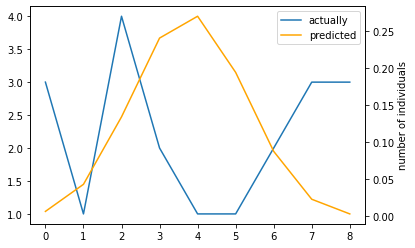

In [66]:
from scipy.stats import binom
y=np.arange(9)
logistic  = lambda beta1, beta2, x:1/(1+math.exp(-(beta1+beta2*x)))
q= logistic(result.params["Intercept"], result.params["x"],4)

fig=plt.figure()
ax1=fig.add_subplot(111)
num_individuals=df_inp[df_inp["x"]==4].groupby("y").size()
ln1=ax1.plot(y,num_individuals, label="actually")

ax2=ax1.twinx()
ln2=ax2.plot(y, [binom.pmf(y_i,8,q) for y_i in y], label="predicted",color="orange")

h1,l1=ax1.get_legend_handles_labels()
h2,l2=ax2.get_legend_handles_labels()
ax1.legend(h1+h2,l1+l2,loc="upper right")

plt.xlabel("y")
plt.ylabel("number of individuals")
plt.show()